### MODELS IMPLEMENTED

### 6. REGRESSION

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler


# Load dataset
df = pd.read_csv("/content/bank_cleaned_data.csv")

# Separate features and target
X = df.drop("y", axis=1)
y = df["y"]

# Encode target: 'yes' = 1, 'no' = 0
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Identify feature types
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Split data once for consistency
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# -------------------------------
# Pipeline for Logistic Regression
# -------------------------------
logistic_preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ]
)

X_train_logistic = logistic_preprocessor.fit_transform(X_train)
X_test_logistic = logistic_preprocessor.transform(X_test)
X_logistic_full = logistic_preprocessor.fit_transform(X)

# -------------------------------
# Pipeline for Multinomial Naive Bayes
# -------------------------------
nb_preprocessor = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), numerical_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ]
)

X_train_nb = nb_preprocessor.fit_transform(X_train)
X_test_nb = nb_preprocessor.transform(X_test)
X_nb_full = nb_preprocessor.fit_transform(X)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_logistic, y_train)
y_pred_lr = lr.predict(X_test_logistic)

# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_nb, y_train)
y_pred_nb = nb.predict(X_test_nb)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate Logistic Regression
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_conf_matrix = confusion_matrix(y_test, y_pred_lr)
lr_report = classification_report(y_test, y_pred_lr, target_names=label_encoder.classes_)

# Evaluate Multinomial Naive Bayes
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_conf_matrix = confusion_matrix(y_test, y_pred_nb)
nb_report = classification_report(y_test, y_pred_nb, target_names=label_encoder.classes_)

# Display results
print("=== Logistic Regression ===")
print(f"Accuracy: {lr_accuracy:.4f}")
print("Confusion Matrix:")
print(lr_conf_matrix)
print("\nClassification Report:")
print(lr_report)

print("\n=== Multinomial Naive Bayes ===")
print(f"Accuracy: {nb_accuracy:.4f}")
print("Confusion Matrix:")
print(nb_conf_matrix)
print("\nClassification Report:")
print(nb_report)


=== Logistic Regression ===
Accuracy: 0.9014
Confusion Matrix:
[[7782  203]
 [ 689  369]]

Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.97      0.95      7985
         yes       0.65      0.35      0.45      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043


=== Multinomial Naive Bayes ===
Accuracy: 0.8906
Confusion Matrix:
[[7779  206]
 [ 783  275]]

Classification Report:
              precision    recall  f1-score   support

          no       0.91      0.97      0.94      7985
         yes       0.57      0.26      0.36      1058

    accuracy                           0.89      9043
   macro avg       0.74      0.62      0.65      9043
weighted avg       0.87      0.89      0.87      9043



In [ ]:
logistic_feature_names = logistic_preprocessor.get_feature_names_out()
nb_feature_names = nb_preprocessor.get_feature_names_out()

# Create dataframes with proper column names

# Logistic
df_train_logistic = pd.concat([
    pd.DataFrame(X_train_logistic.toarray() if hasattr(X_train_logistic, 'toarray') else X_train_logistic,
                 columns=logistic_feature_names),
    pd.DataFrame(y_train, columns=["y"])
], axis=1)

df_test_logistic = pd.concat([
    pd.DataFrame(X_test_logistic.toarray() if hasattr(X_test_logistic, 'toarray') else X_test_logistic,
                 columns=logistic_feature_names),
    pd.DataFrame(y_test, columns=["y"])
], axis=1)

df_logistic_full = pd.concat([
    pd.DataFrame(X_logistic_full.toarray() if hasattr(X_logistic_full, 'toarray') else X_logistic_full,
                 columns=logistic_feature_names),
    pd.DataFrame(y_encoded, columns=["y"])
], axis=1)

# Multinomial Naive Bayes
df_train_nb = pd.concat([
    pd.DataFrame(X_train_nb.toarray() if hasattr(X_train_nb, 'toarray') else X_train_nb,
                 columns=nb_feature_names),
    pd.DataFrame(y_train, columns=["y"])
], axis=1)

df_test_nb = pd.concat([
    pd.DataFrame(X_test_nb.toarray() if hasattr(X_test_nb, 'toarray') else X_test_nb,
                 columns=nb_feature_names),
    pd.DataFrame(y_test, columns=["y"])
], axis=1)

df_nb_full = pd.concat([
    pd.DataFrame(X_nb_full.toarray() if hasattr(X_nb_full, 'toarray') else X_nb_full,
                 columns=nb_feature_names),
    pd.DataFrame(y_encoded, columns=["y"])
], axis=1)

# Save to CSV
df_logistic_full.to_csv("prepared_data_logistic.csv", index=False)
df_train_logistic.to_csv("train_data_logistic.csv", index=False)
df_test_logistic.to_csv("test_data_logistic.csv", index=False)

df_nb_full.to_csv("prepared_data_nb.csv", index=False)
df_train_nb.to_csv("train_data_nb.csv", index=False)
df_test_nb.to_csv("test_data_nb.csv", index=False)

In [ ]:
# Define file names
file_names = {
    "Prepared Data (Logistic)": "prepared_data_logistic.csv",
    "Train Data (Logistic)": "train_data_logistic.csv",
    "Test Data (Logistic)": "test_data_logistic.csv",
    "Prepared Data (NB)": "prepared_data_nb.csv",
    "Train Data (NB)": "train_data_nb.csv",
    "Test Data (NB)": "test_data_nb.csv"
}

# Check for missing values in each file
print("=== Missing Value Check ===\n")
for name, path in file_names.items():
    try:
        df = pd.read_csv(path)
        missing = df.isnull().sum().sum()
        status = f"No missing values ✅" if missing == 0 else f"{missing} missing values ❗"
        print(f"{name}: {status}")
    except FileNotFoundError:
        print(f"{name}: File not found ❌")

=== Missing Value Check ===

Prepared Data (Logistic): No missing values ✅
Train Data (Logistic): No missing values ✅
Test Data (Logistic): No missing values ✅
Prepared Data (NB): No missing values ✅
Train Data (NB): No missing values ✅
Test Data (NB): No missing values ✅


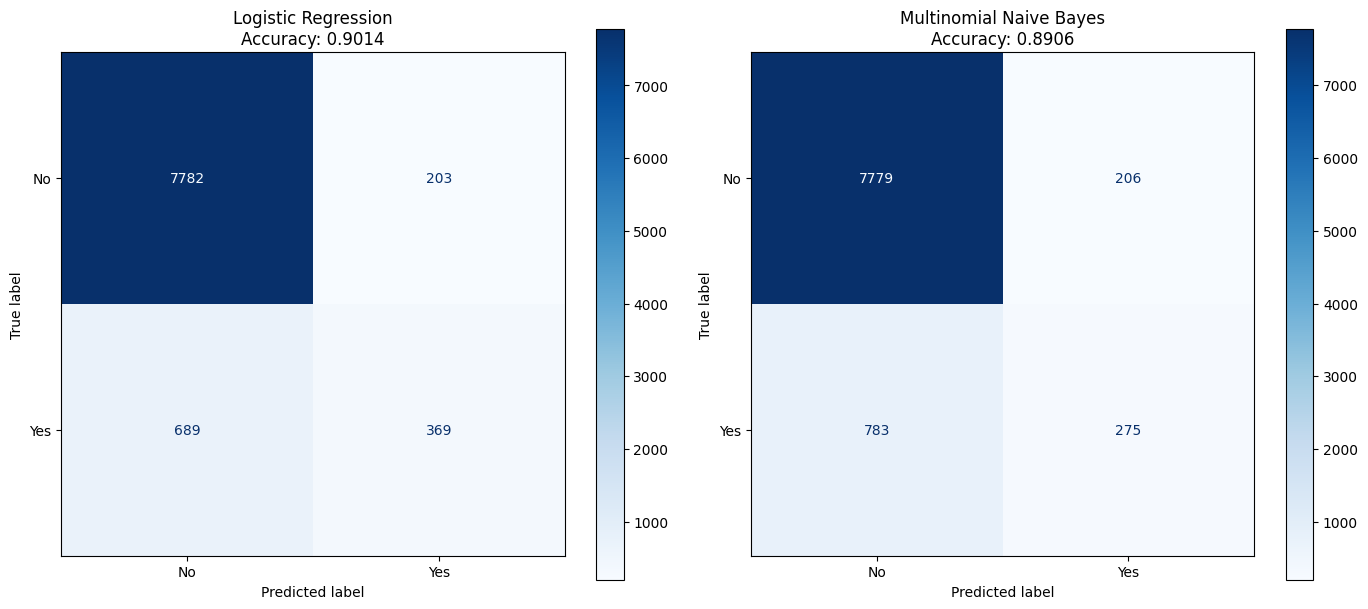

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Convert confusion matrix lists to numpy arrays
lr_conf_matrix = np.array([[7782, 203],
                           [689,  369]])

nb_conf_matrix = np.array([[7779, 206],
                           [783,  275]])

# Re-plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

ConfusionMatrixDisplay(confusion_matrix=lr_conf_matrix,
                       display_labels=["No", "Yes"]).plot(ax=axes[0], cmap="Blues", values_format='d')
axes[0].set_title(f"Logistic Regression\nAccuracy: {lr_accuracy:.4f}")

ConfusionMatrixDisplay(confusion_matrix=nb_conf_matrix,
                       display_labels=["No", "Yes"]).plot(ax=axes[1], cmap="Blues", values_format='d')
axes[1].set_title(f"Multinomial Naive Bayes\nAccuracy: {nb_accuracy:.4f}")

plt.tight_layout()
plt.show()

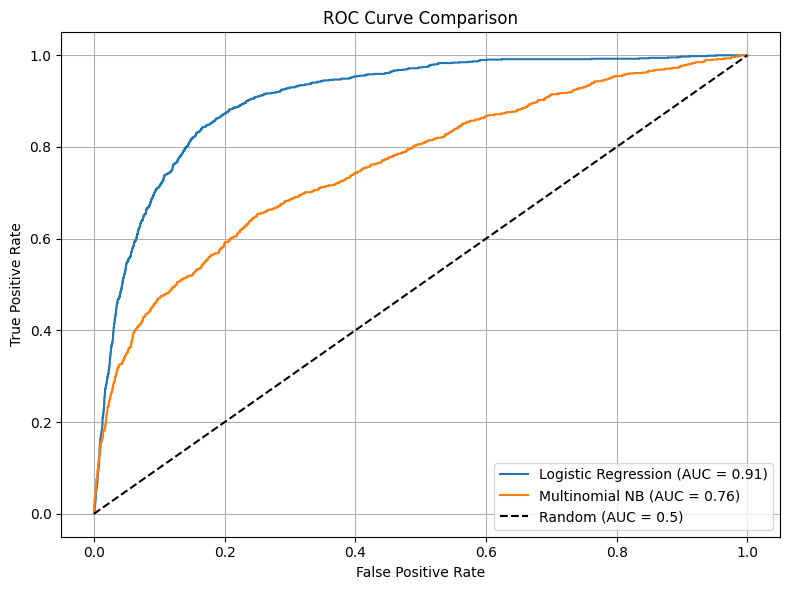

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predicted probabilities
y_prob_lr = lr.predict_proba(X_test_logistic)[:, 1]
y_prob_nb = nb.predict_proba(X_test_nb)[:, 1]

# ROC curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)

# AUC
auc_lr = auc(fpr_lr, tpr_lr)
auc_nb = auc(fpr_nb, tpr_nb)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})")
plt.plot(fpr_nb, tpr_nb, label=f"Multinomial NB (AUC = {auc_nb:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random (AUC = 0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

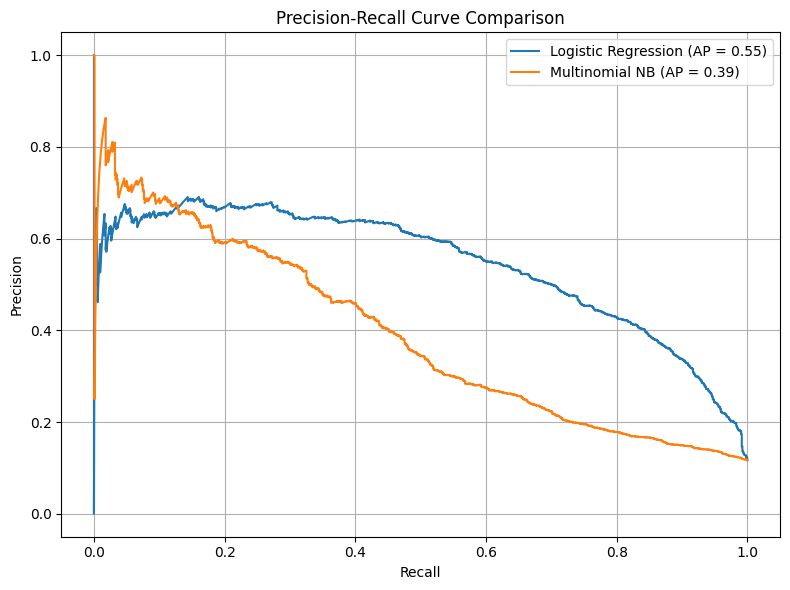

In [23]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_prob_lr)
precision_nb, recall_nb, _ = precision_recall_curve(y_test, y_prob_nb)

ap_lr = average_precision_score(y_test, y_prob_lr)
ap_nb = average_precision_score(y_test, y_prob_nb)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(recall_lr, precision_lr, label=f"Logistic Regression (AP = {ap_lr:.2f})")
plt.plot(recall_nb, precision_nb, label=f"Multinomial NB (AP = {ap_nb:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

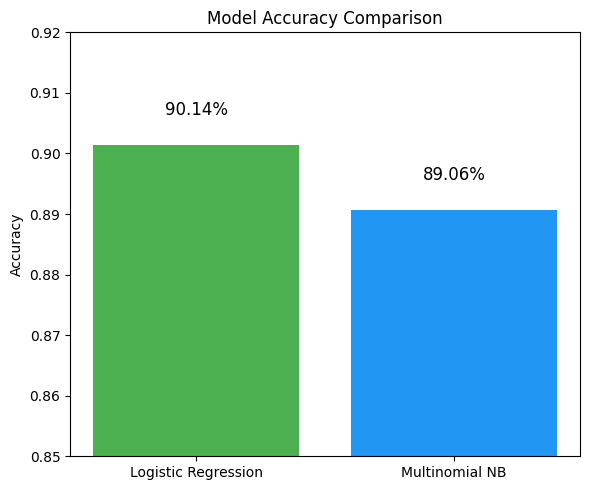

In [24]:
models = ["Logistic Regression", "Multinomial NB"]
accuracies = [lr_accuracy, nb_accuracy]

plt.figure(figsize=(6, 5))
bars = plt.bar(models, accuracies, color=["#4CAF50", "#2196F3"])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.005, f"{height:.2%}", ha='center', fontsize=12)

plt.ylim(0.85, 0.92)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.tight_layout()
plt.show()
